In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Horses and Humans

## Downloading the Data

In [2]:
# Loading the Data
import urllib.request
import zipfile

# URL to the Dataset
download_training_url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

# Filename once loaded into my workspace
filename = "horse-or-human.zip"

# Downloading the File
urllib.request.urlretrieve(download_training_url, filename)

# Training Directory in my Workspace
train_dir = "horse-or-human/training"

# Extracting the Zipfile
zip_ref_train = zipfile.ZipFile(filename, "r")
zip_ref_train.extractall(train_dir)
zip_ref_train.close()

In [3]:
download_validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

filename = "validation-horse-or-human.zip"
urllib.request.urlretrieve(download_validation_url, filename)

valid_dir = "horse-or-human/validation"
zip_ref_valid = zipfile.ZipFile(filename, "r")
zip_ref_valid.extractall(valid_dir)
zip_ref_valid.close()

## Accessing the Data

In [4]:
import os

train_horse = os.path.join("/kaggle/working/horse-or-human", "training/horses/")
train_humans = os.path.join("/kaggle/working/horse-or-human", "training/humans/")

valid_horses = os.path.join("/kaggle/working/horse-or-human", "validation/horses/")
valid_humans = os.path.join("/kaggle/working/horse-or-human", "validation/humans/")

print(valid_humans)
os.path.exists(valid_humans)

/kaggle/working/horse-or-human/validation/humans/


True

In [5]:
images_train_horse = os.listdir(train_horse)
print("Training Images of Horses")
print(images_train_horse[:5])

images_train_human = os.listdir(train_humans)
print("\nTraining Images of Humans")
print(images_train_human[:5])

images_valid_horse = os.listdir(valid_horses)
print("\nValidation Images of Horses")
print(images_valid_horse[:5])

images_valid_human = os.listdir(valid_humans)
print("\nValidation Images of Humans")
print(images_valid_human[:5])

Training Images of Horses
['horse21-6.png', 'horse46-3.png', 'horse48-4.png', 'horse22-3.png', 'horse08-2.png']

Training Images of Humans
['human13-16.png', 'human06-24.png', 'human12-15.png', 'human10-09.png', 'human11-24.png']

Validation Images of Horses
['horse1-122.png', 'horse2-596.png', 'horse5-400.png', 'horse4-501.png', 'horse4-588.png']

Validation Images of Humans
['valhuman02-09.png', 'valhuman01-20.png', 'valhuman02-02.png', 'valhuman03-10.png', 'valhuman03-02.png']


## Viewing the Images

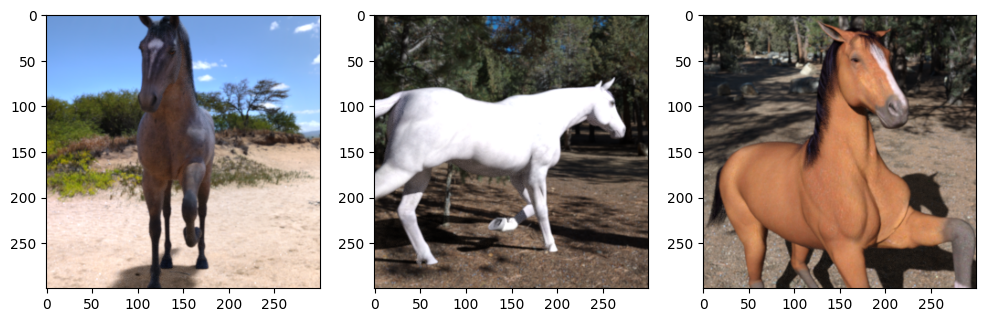

In [6]:
import matplotlib.image as mpimg

# Index for Subplots
i = 1

# Adjusting the Plot Layout
plt.figure(figsize=(12, 15))

# Plotting the Images
for image in images_train_horse[:3]:
    
    # Accessing the Path of the Image
    image_path = os.path.join(train_horse, image)
    
    plt.subplot(1, 3, i)
    loaded_image = mpimg.imread(image_path)
    plt.imshow(loaded_image)
    
    # Updating the Index for the Subplot
    i += 1
    
plt.show()

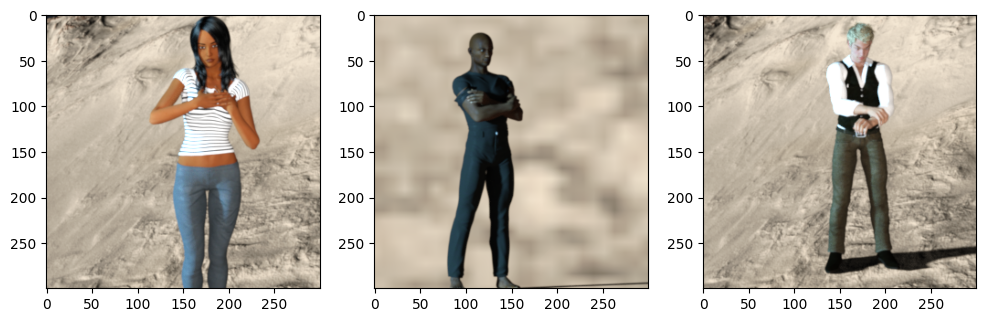

In [7]:
# Index for Subplots
i = 1

# Adjusting the Plot Layout
plt.figure(figsize=(12, 15))

# Plotting the Images
for image in images_train_human[:3]:
    
    # Accessing the Path of the Image
    image_path = os.path.join(train_humans, image)
    
    plt.subplot(1, 3, i)
    loaded_image = mpimg.imread(image_path)
    plt.imshow(loaded_image)
    
    # Updating the Index for the Subplot
    i += 1
    
plt.show()

## Autolabelling the Images using the TensorFlow ImageDataGenerator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalising all the Images
train_datagen = ImageDataGenerator(rescale=1/255)

# Autolabelling the Training Images
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(300, 300), class_mode="binary"
)

Found 1027 images belonging to 2 classes.


In [9]:
# Applying the Autolabelling for Validation Images
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_gen = valid_datagen.flow_from_directory(
    valid_dir, target_size=(300, 300), class_mode="binary"
)

Found 256 images belonging to 2 classes.


## Creating the Model

In [10]:
tf.keras.backend.clear_session()

In [11]:
horse_human_model_reverse = tf.keras.models.Sequential([
    
    # Convolutional Layers
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    
    # Output Layer for Binary Classification to distinguish Horses and Humans
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [12]:
horse_human_model_reverse.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [13]:
horse_human_model_reverse.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [14]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get("accuracy") > 0.97:
            print("\nAccuracy Achieved, Stopping Training ....")
            self.model.stop_training = True
    
            
my_cb = MyCallback()

In [15]:
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

In [16]:
history = horse_human_model_reverse.fit(
    train_gen, validation_data=valid_gen, 
    epochs=50, callbacks=[earlystop_cb, my_cb]
)

Epoch 1/50
33/33 [==============================] - 18s 318ms/step - loss: 0.5750 - accuracy: 0.6904 - val_loss: 0.7797 - val_accuracy: 0.7852
Epoch 2/50
33/33 [==============================] - 10s 316ms/step - loss: 0.3871 - accuracy: 0.8724 - val_loss: 0.6554 - val_accuracy: 0.8203
Epoch 3/50
33/33 [==============================] - 10s 311ms/step - loss: 0.7336 - accuracy: 0.7322 - val_loss: 0.3820 - val_accuracy: 0.8750
Epoch 4/50
33/33 [==============================] - 10s 314ms/step - loss: 0.4316 - accuracy: 0.8656 - val_loss: 1.2412 - val_accuracy: 0.8398
Epoch 5/50
33/33 [==============================] - 10s 310ms/step - loss: 0.6791 - accuracy: 0.8471 - val_loss: 1.6148 - val_accuracy: 0.8828
Epoch 6/50
33/33 [==============================] - 10s 308ms/step - loss: 0.5231 - accuracy: 0.8802 - val_loss: 1.8489 - val_accuracy: 0.8984
Epoch 7/50
33/33 [==============================] - 11s 318ms/step - loss: 0.1198 - accuracy: 0.9611 - val_loss: 1.0162 - val_accuracy: 0.8867

<Axes: >

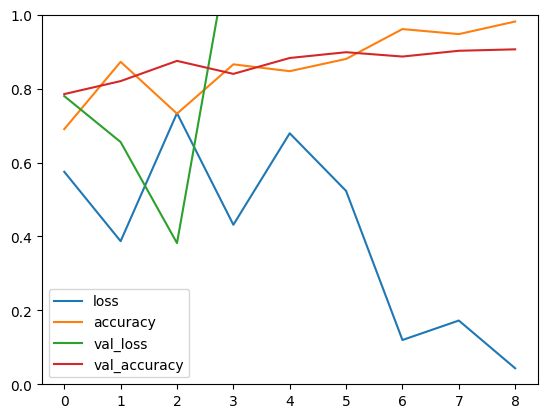

In [17]:
pd.DataFrame(history.history).plot(ylim=[0, 1])

**Inference**
- The Model is Overfitting due to lack of data and high variance in instances trained

## Testing the Model

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
for i in images_valid_horse[:3]:
    
    # Locating and Loading the Image
    image_path = os.path.join(valid_horses, i)
    load_image = image.load_img(image_path, target_size=(300, 300))
    
    # Adjusting the Image to the Model
    x = image.img_to_array(load_image)
    x = np.expand_dims(x, axis=0)
    image_tensor = np.vstack([x])
    
    # Making the Prediction
    prediction = horse_human_model_reverse.predict(image_tensor)
    print(prediction)
    
    if prediction < 0.5:
        print(f"{i} is the image of a Horse")
        
    else:
        print(f"{i} is the image of a Human")
    

1/1 [==============================] - 0s 283ms/step
[[0.]]
horse1-122.png is the image of a Horse
1/1 [==============================] - 0s 22ms/step
[[1.]]
horse2-596.png is the image of a Human
1/1 [==============================] - 0s 22ms/step
[[0.]]
horse5-400.png is the image of a Horse


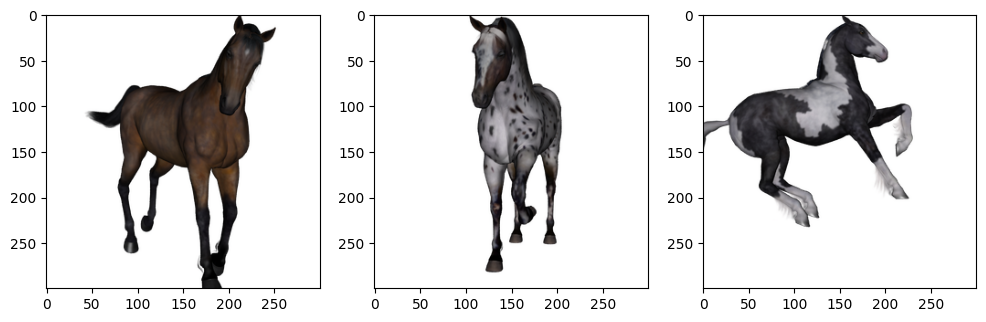

In [20]:
j = 1
plt.figure(figsize=(12, 15))
for i in images_valid_horse[:3]:
    
    # Accessing and Loading the Image
    plt_image = mpimg.imread(os.path.join(valid_horses, i))
    
    # Displaying the Image
    plt.subplot(1, 3, j)
    plt.imshow(plt_image)
    j += 1

plt.show()

**Inference**
- The model thus got the first prediction correct but overfit to the images of humans and predicted the other images incorrectly

1/1 [==============================] - 0s 22ms/step
[[1.]]
valhuman02-09.png is the image of a Human
1/1 [==============================] - 0s 24ms/step
[[1.]]
valhuman01-20.png is the image of a Human
1/1 [==============================] - 0s 24ms/step
[[1.]]
valhuman02-02.png is the image of a Human


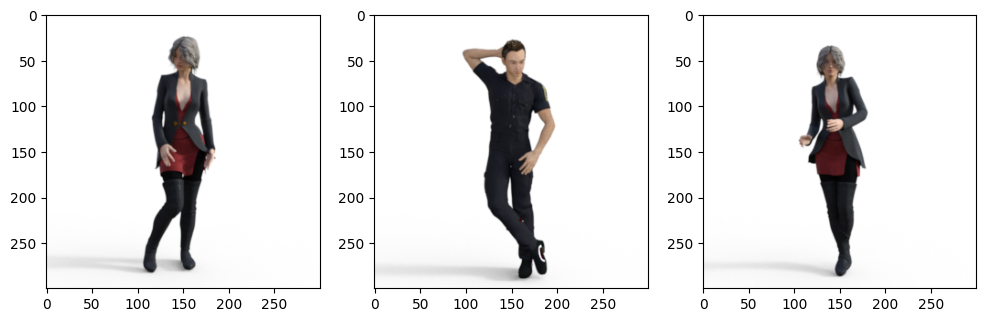

In [21]:
j = 1
plt.figure(figsize=(12, 15))
for i in images_valid_human[:3]:
    
    # Locating and Loading the Image
    image_path = os.path.join(valid_humans, i)
    load_image = image.load_img(image_path, target_size=(300, 300))
    
    # Adjusting the Image to the Model
    x = image.img_to_array(load_image)
    x = np.expand_dims(x, axis=0)
    image_tensor = np.vstack([x])
    
    # Making the Prediction
    prediction = horse_human_model_reverse.predict(image_tensor)
    print(prediction)
    
    if prediction < 0.5:
        print(f"{i} is the image of a Horse")
        
    else:
        print(f"{i} is the image of a Human")
        
    # Locating and Loading the Image
    plt_image = mpimg.imread(image_path)
    
    # Displaying the Image
    plt.subplot(1, 3, j)
    plt.imshow(plt_image)
    j += 1
    
plt.show()

## Improving Performance using Image Augmentation

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1/255, rotation_range=40, shear_range=0.2,
    width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, 
    horizontal_flip=True, fill_mode="nearest"
)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), class_mode="binary")

Found 1027 images belonging to 2 classes.


In [23]:
valid_gen = train_datagen.flow_from_directory(valid_dir, target_size=(300, 300), class_mode="binary")

Found 256 images belonging to 2 classes.


In [24]:
tf.keras.backend.clear_session()

In [25]:
horse_human_model_inline = tf.keras.models.Sequential([
    
    # Convolutional Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    
    # Output Layer for Binary Classification to distinguish Horses and Humans
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
horse_human_model_inline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [27]:
horse_human_model_inline.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [28]:
history = horse_human_model_inline.fit(
    train_gen, validation_data=valid_gen,
    epochs=20, callbacks=[earlystop_cb]
)

Epoch 1/20
33/33 [==============================] - 41s 1s/step - loss: 0.6731 - accuracy: 0.5852 - val_loss: 0.6829 - val_accuracy: 0.5117
Epoch 2/20
33/33 [==============================] - 36s 1s/step - loss: 0.5912 - accuracy: 0.6806 - val_loss: 0.8480 - val_accuracy: 0.5195
Epoch 3/20
33/33 [==============================] - 37s 1s/step - loss: 0.6290 - accuracy: 0.6680 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 4/20
33/33 [==============================] - 38s 1s/step - loss: 0.5472 - accuracy: 0.7137 - val_loss: 0.8560 - val_accuracy: 0.5195
Epoch 5/20
33/33 [==============================] - 38s 1s/step - loss: 0.5049 - accuracy: 0.7585 - val_loss: 0.6918 - val_accuracy: 0.6055
Epoch 6/20
33/33 [==============================] - 39s 1s/step - loss: 0.5158 - accuracy: 0.7342 - val_loss: 0.6557 - val_accuracy: 0.5742
Epoch 7/20
33/33 [==============================] - 39s 1s/step - loss: 0.8472 - accuracy: 0.7614 - val_loss: 0.7740 - val_accuracy: 0.5352
Epoch 8/20
33/33 [==

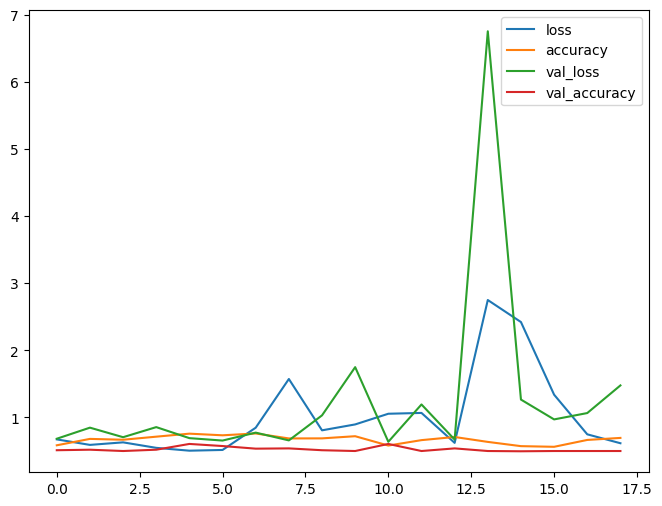

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.show()

## Testing the Performance of the Model

1/1 [==============================] - 0s 225ms/step
[[0.]]
valhuman02-09.png is the image of a Horse
1/1 [==============================] - 0s 25ms/step
[[0.]]
valhuman01-20.png is the image of a Horse
1/1 [==============================] - 0s 27ms/step
[[0.]]
valhuman02-02.png is the image of a Horse


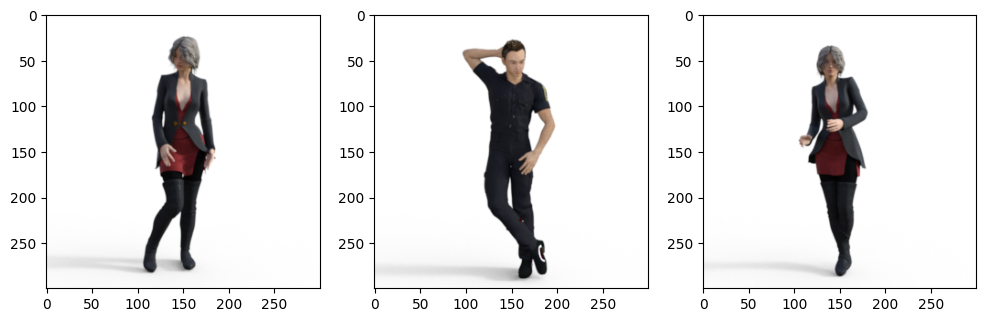

In [30]:
j = 1
plt.figure(figsize=(12, 15))
for i in images_valid_human[:3]:
    
    # Locating and Loading the Image
    image_path = os.path.join(valid_humans, i)
    load_image = image.load_img(image_path, target_size=(300, 300))
    
    # Adjusting the Image to the Model
    x = image.img_to_array(load_image)
    x = np.expand_dims(x, axis=0)
    image_tensor = np.vstack([x])
    
    # Making the Prediction
    prediction = horse_human_model_inline.predict(image_tensor)
    print(prediction)
    
    if prediction < 0.5:
        print(f"{i} is the image of a Horse")
        
    else:
        print(f"{i} is the image of a Human")
        
    # Locating and Loading the Image
    plt_image = mpimg.imread(image_path)
    
    # Displaying the Image
    plt.subplot(1, 3, j)
    plt.imshow(plt_image)
    j += 1
    
plt.show()

1/1 [==============================] - 0s 24ms/step
[[1.]]
horse1-122.png is the image of a Human
1/1 [==============================] - 0s 24ms/step
[[0.]]
horse2-596.png is the image of a Horse
1/1 [==============================] - 0s 26ms/step
[[0.]]
horse5-400.png is the image of a Horse


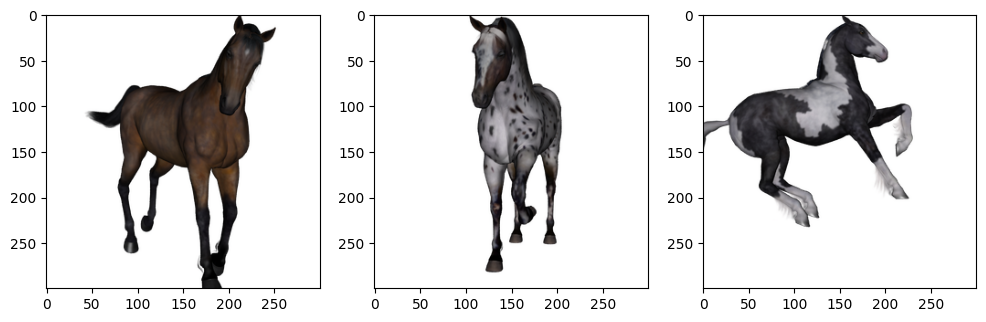

In [31]:
j = 1
plt.figure(figsize=(12, 15))
for i in images_valid_horse[:3]:
    
    # Locating and Loading the Image
    image_path = os.path.join(valid_horses, i)
    load_image = image.load_img(image_path, target_size=(300, 300))
    
    # Adjusting the Image to the Model
    x = image.img_to_array(load_image)
    x = np.expand_dims(x, axis=0)
    image_tensor = np.vstack([x])
    
    # Making the Prediction
    prediction = horse_human_model_inline.predict(image_tensor)
    print(prediction)
    
    if prediction < 0.5:
        print(f"{i} is the image of a Horse")
        
    else:
        print(f"{i} is the image of a Human")
        
    # Locating and Loading the Image
    plt_image = mpimg.imread(image_path)
    
    # Displaying the Image
    plt.subplot(1, 3, j)
    plt.imshow(plt_image)
    j += 1
    
plt.show()